## Import Libraries

In [1]:
# Import the TensorFlow library
import tensorflow as tf

# Import the Keras API from TensorFlow
from tensorflow import keras

# Import the layers module from the Keras API for building neural network layers
from tensorflow.keras import layers

# Import the MNIST dataset, which is a collection of handwritten digits
from tensorflow.keras.datasets import mnist


In [3]:
import matplotlib.pyplot as plt  # For plotting images

## GPUs

In [2]:
# # List all physical devices of the type "GPU" available on the machine
# physical_devices = tf.config.list_physical_devices("GPU")

# # Set memory growth on the first GPU device to allow TensorFlow to allocate GPU memory incrementally
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

# physical_devices


[]

## Load and split the MNIST dataset

In [5]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shape of the dataset
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


In [17]:
type(x_train)

numpy.ndarray

In [8]:
# Function to plot images from the dataset
def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

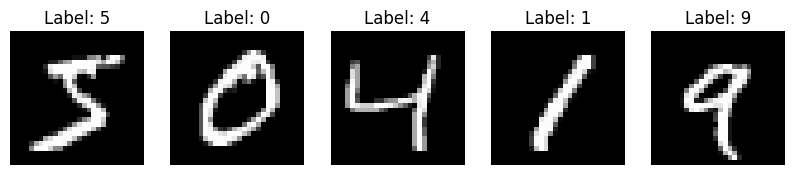

In [10]:
# Plot some sample images from the training set
plot_sample_images(x_train, y_train)

## Flatten and Normalize images

### Flattening Images

To prepare the images for the neural network, we reshape the data from a 3D array to a 2D array using `reshape(-1, 28 * 28)`. This process flattens each 28x28 image into a single row with 784 elements. Neural networks typically require input data in this 2D format, where each row represents one flattened image.

### Normalizing Images

We normalize the pixel values by dividing by 255.0, which scales the pixel values from the original range of 0 to 255 to a new range of 0 to 1. Normalization helps to improve the stability and speed of the neural network's training process, as networks generally perform better when input features are on a consistent scale.


In [21]:
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

In [22]:
# Display the shape of the dataset
print("Training data shape after flatten images:", x_train.shape)
print("Test data shape after flatten images:", x_test.shape)

Training data shape after flatten images: (60000, 784)
Test data shape after flatten images: (10000, 784)


In [19]:
# import json
print("First 5 rows of x_train:\n",  json.dumps(x_train[:2].tolist(), indent=2))

First 5 rows of x_train:
 [
  [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0

In [20]:
x_train.shape

(60000, 784)